# Laboratorio 2 Machine Learning:

1. Find a new publicly available dataset between 3 to 10 classes, with no more than 1’000’000 data points, and no less than 1’000 data points You can not use MNIST, but can use derivatives.

For this lab we will use `Fashion MNIST` wich is freely available in kaggle. It consists of labeled 28 by 28 grayscale images depicting an article of clothing. These belong to the following categories:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

The data utilizes the numeric shorthands for labels depicted on the above list.
We will use the `scikit learn` python library for the purposes of classification.

In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../Data/fashion-mnist_train.csv") #we will use the pre-separated training data

2. Define your Training Set, Your testing Set, and Testing Set. How will you partition your data? What is the percentile split? (example: 80% Training, 10% validation, 10% validation). Why did you pick this split?
   
    We will split our data int he following way: 80% training, 10% validation and 10% testing. This follows from the recommendation of [V7labs](https://www.v7labs.com/blog/train-testing-test-set#h2), since we have a small ammount of hyperparameters to tune with the testing set. Furthermore, we are selecting the data for each category randomly. 

In [4]:
############ SEPARATE DATA ###############

training_feat = data.sample(frac=0.8)
training_lab = training_feat['label']
data = data.drop(training_feat.index) #remove used values
training_feat = training_feat.drop(columns='label')

validation_feat = data.sample(frac=0.5) # 0.5 * 0.2 = 0.1
validation_lab = validation_feat['label']
data = data.drop(validation_feat.index) #remove used values
validation_feat = validation_feat.drop(columns='label')

testing_feat = data # 0nly 0.1 left on data, copy it
testing_lab  = testing_feat['label']
testing_feat = testing_feat.drop(columns='label')

del data #dont contaminate ram pls

3. Use a Multi-Class logistic regression classifier to perform a classification for the classes selected. Report the Confusion Matrices (as percentages) for the Training Set, the testing Set, and the Testing Set. Properly label the Actual + Prediction dataset.
   
   Hyperparameters and fitting of the model:

In [52]:
classifier = linear_model.LogisticRegression(penalty=None,  #regularization
                                            solver='saga', # for support of all regularization strats + fast: all features are within 0-255
                                            n_jobs=4
                                             )


In [53]:
classifier.fit(training_feat,training_lab)

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(n_jobs=4, penalty=None, solver='saga')

Confusion Matrixes:

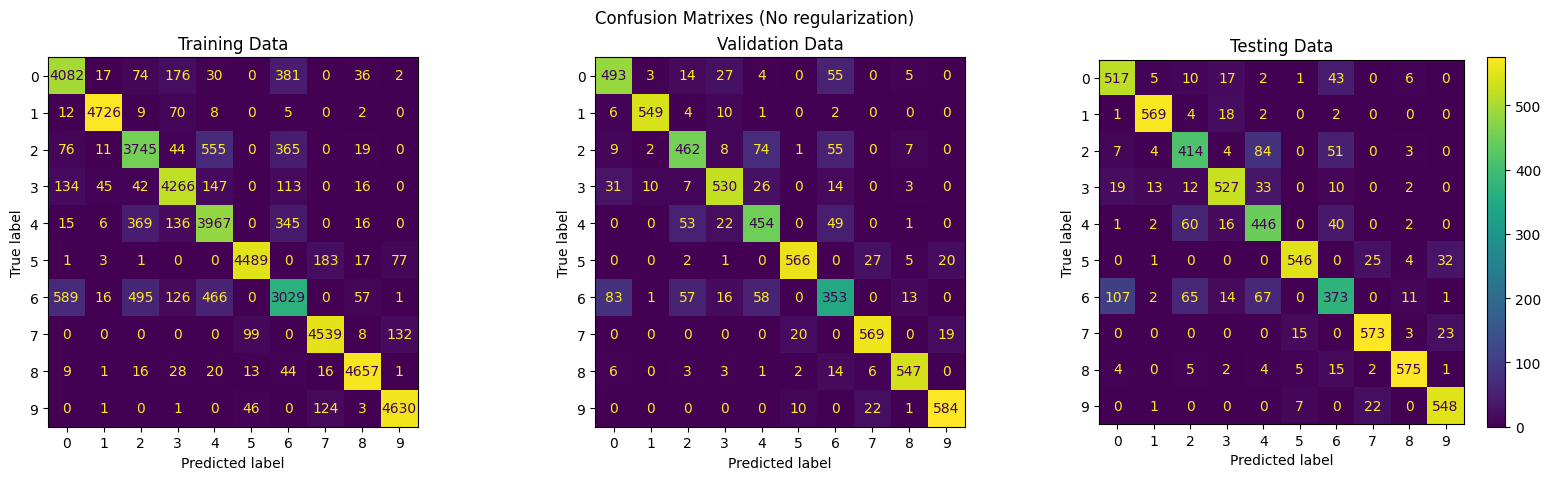

In [54]:
fig, slots = plt.subplots(ncols=3)
fig.suptitle("Confusion Matrixes (No regularization)")

metrics.ConfusionMatrixDisplay.from_estimator(classifier,training_feat,training_lab,ax=slots[0],colorbar=False)
slots[0].set_title("Training Data")

metrics.ConfusionMatrixDisplay.from_estimator(classifier,validation_feat,validation_lab,ax=slots[1],colorbar=False)
slots[1].set_title("Validation Data")

metrics.ConfusionMatrixDisplay.from_estimator(classifier,testing_feat,testing_lab,ax=slots[2],colorbar=True)
slots[2].set_title("Testing Data")

fig.set_figwidth(20)
plt.show(fig)

4. Perform an L0, L1 or L2 regularization on the Multi-Class Logistic Regression for the previous classes. Re-plot the confusion matrices. What has changed? Is it better or worse than before adding regularization? Why?

As far as we understand, L0 regularization is no regularization, wich was done on the previous question. Hence, we will perform the experiment for l2 and l1. 

## L1 Regularization:

In [58]:
classifier_l1 = classifier = linear_model.LogisticRegression(penalty='l1',  #regularization
                                            solver='saga', # for support of all regularization strats + fast: all features are within 0-255
                                            n_jobs=4
                                            )

In [59]:
classifier_l1.fit(training_feat,training_lab)

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(n_jobs=4, penalty='l1', solver='saga')

### Confusion

Confusion on training data:

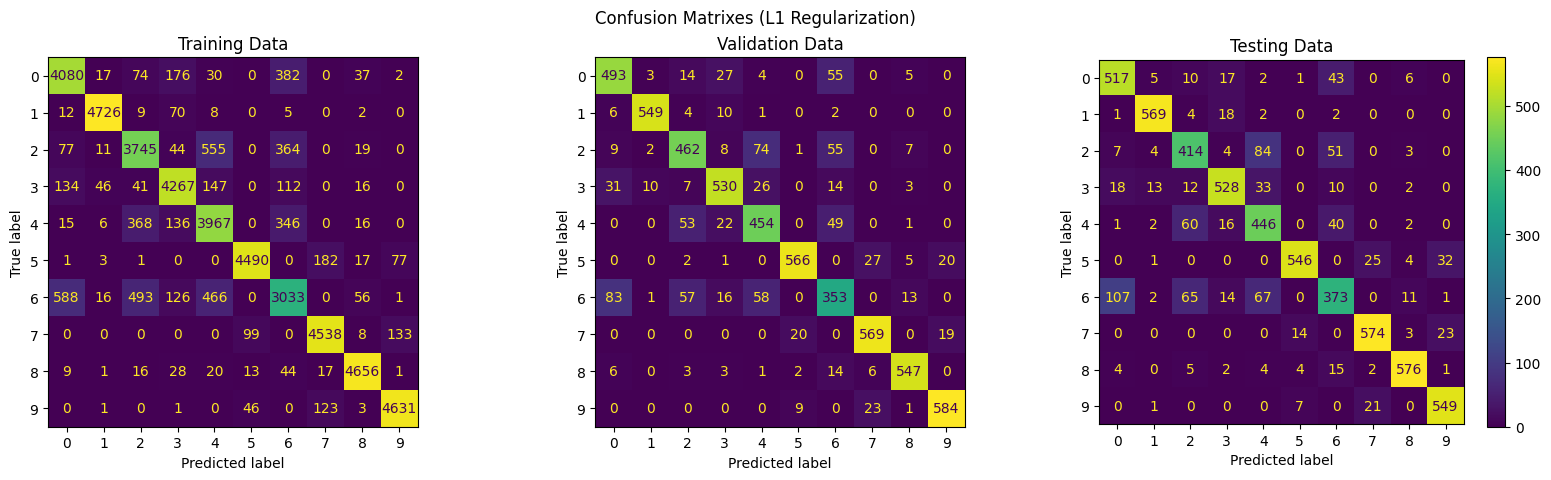

In [60]:
fig, slots = plt.subplots(ncols=3)
fig.suptitle("Confusion Matrixes (L1 Regularization)")

metrics.ConfusionMatrixDisplay.from_estimator(classifier_l1,training_feat,training_lab,ax=slots[0],colorbar=False)
slots[0].set_title("Training Data")

metrics.ConfusionMatrixDisplay.from_estimator(classifier_l1,validation_feat,validation_lab,ax=slots[1],colorbar=False)
slots[1].set_title("Validation Data")

metrics.ConfusionMatrixDisplay.from_estimator(classifier_l1,testing_feat,testing_lab,ax=slots[2],colorbar=True)
slots[2].set_title("Testing Data")

fig.set_figwidth(20)
plt.show(fig)

We can see minute differences in the testing data (see cell 8,8 or 0,8 of test performance on no regularization vs l1). No visible improvement.

## L2 Regularization


Code for the model parameters and training:

In [61]:
classifier_l2 = classifier = linear_model.LogisticRegression(penalty='l2',  #regularization
                                            solver='saga', # for support of all regularization strats + fast: all features are within 0-255
                                            n_jobs=4
                                            )

In [62]:
classifier_l2.fit(training_feat,training_lab)

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(n_jobs=4, solver='saga')

### Confusion
Confusion matrices for L2 Regularization:

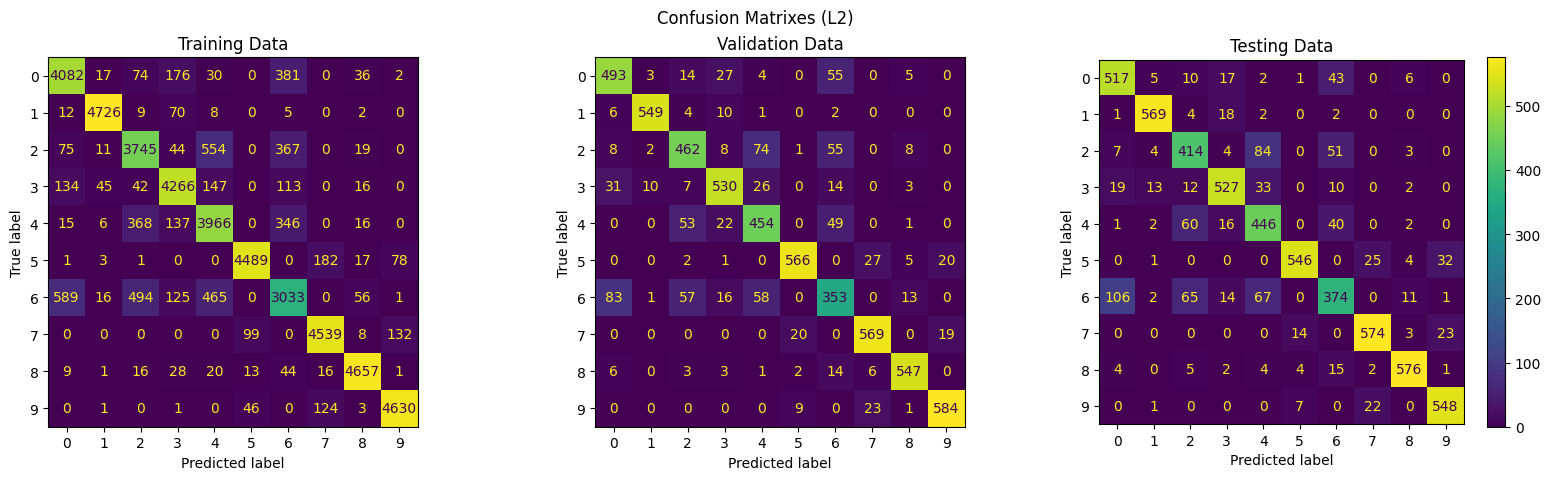

In [63]:
fig, slots = plt.subplots(ncols=3)
fig.suptitle("Confusion Matrixes (L2)")

metrics.ConfusionMatrixDisplay.from_estimator(classifier_l2,training_feat,training_lab,ax=slots[0],colorbar=False)
slots[0].set_title("Training Data")

metrics.ConfusionMatrixDisplay.from_estimator(classifier_l2,validation_feat,validation_lab,ax=slots[1],colorbar=False)
slots[1].set_title("Validation Data")

metrics.ConfusionMatrixDisplay.from_estimator(classifier_l2,testing_feat,testing_lab,ax=slots[2],colorbar=True)
slots[2].set_title("Testing Data")

fig.set_figwidth(20)
plt.show(fig)

We see (very) minute improvements in the ability of the model to predict the categories (compare diagonal with no regularization). 

We believe this behaviour is due to the fact that most of the time the fitting was stopped before convergence by the scikit method, yielding a less strongly fitted model. The causes for this are still unknown to us.

5. 5-Fold Cross-Validation: From the total initial dataset using L0, L1 or L2 regularization: repeat the classification model 5 times through non-overlapping cross-validation. Report the Confusion Matrix on the Training, Validation and Testing Data for each partition. You should be plotting a total of 15 sub-figures (3 training/validation/testing x 5 validations). Do this only for 1 set of hyperparameters.

    We decided to work with no regularization because the time to train is very high on our devices. Below we implemented a function wich will train and report the confusion matrixes of the model given specific training, validation, and testing sets. We will maintain the already used testing and validation sets. The only dataset that will be subdivided is the training data.

In [49]:
def trainAndPlotConfusionMatrix(tr_lab,tr_feat,v_lab,v_feat,te_lab,te_feat, fig_label="Untitled"):
    classifier_model = linear_model.LogisticRegression(
        penalty = None,
        solver='saga',
        n_jobs=4
    )

    classifier_model.fit(tr_feat,tr_lab)
    
    fig, slots = plt.subplots(ncols=3,nrows=1)
    metrics.ConfusionMatrixDisplay.from_estimator(classifier_model,tr_feat,tr_lab,ax=slots[0],colorbar=False)
    slots[0].set_title("Training Data")
    metrics.ConfusionMatrixDisplay.from_estimator(classifier_model,v_feat,v_lab,ax=slots[1],colorbar=False)
    slots[1].set_title("Validation Data")
    metrics.ConfusionMatrixDisplay.from_estimator(classifier_model,te_feat,te_lab,ax=slots[2])
    slots[2].set_title("Testing Data")
    fig.set_figwidth(20)
    fig.suptitle(fig_label)
    plt.show(fig)

To divide the data, we will simply split the data by index because we shuffled it at the previous separation. This means no dataset-dependent clusters of datapoints should remain.

In [47]:
# split the training dataset into 5 non-overlapping sections
t_len = len(training_feat.index)

training_feat_1 = training_feat.iloc[(t_len*(1-1))//5:(t_len*(1))//5 - 1] # from floor((t_len*i-1)/5) to floor((t_len*i)/5) - 1
training_lab_1  =  training_lab.iloc[(t_len*(1-1))//5:(t_len*(1))//5 - 1] # for no ovelap

training_feat_2 = training_feat.iloc[(t_len*(2-1))//5:(t_len*(2))//5 - 1] 
training_lab_2  =  training_lab.iloc[(t_len*(2-1))//5:(t_len*(2))//5 - 1] 

training_feat_3 = training_feat.iloc[(t_len*(3-1))//5:(t_len*(3))//5 - 1] # for some reason the df complains abt index 19200 ¯\_(ツ)_/¯
training_lab_3  =  training_lab.iloc[(t_len*(3-1))//5:(t_len*(3))//5 - 1] 

training_feat_4 = training_feat.iloc[(t_len*(4-1))//5:(t_len*(4))//5 - 1] 
training_lab_4  =  training_lab.iloc[(t_len*(4-1))//5:(t_len*(4))//5 - 1] 

training_feat_5 = training_feat.iloc[(t_len*(5-1))//5:(t_len*(5))//5 - 1] 
training_lab_5  =  training_lab.iloc[(t_len*(5-1))//5:(t_len*(5))//5 - 1] 

From the training data derived above, we plot the relevant confusion matrices.

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


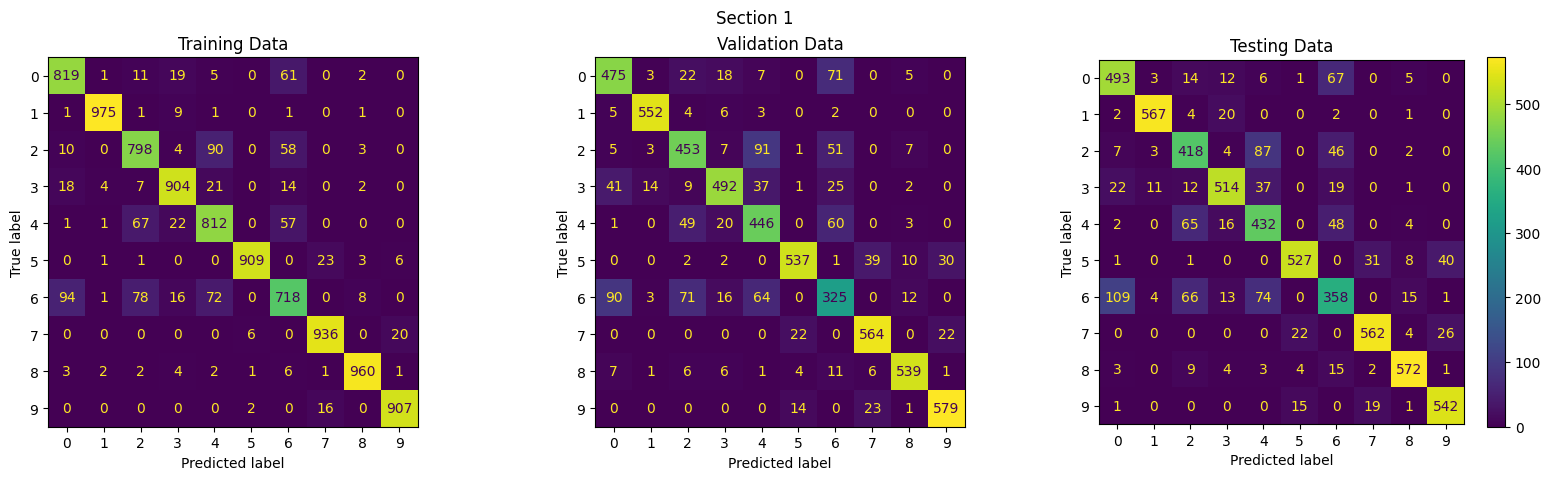

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


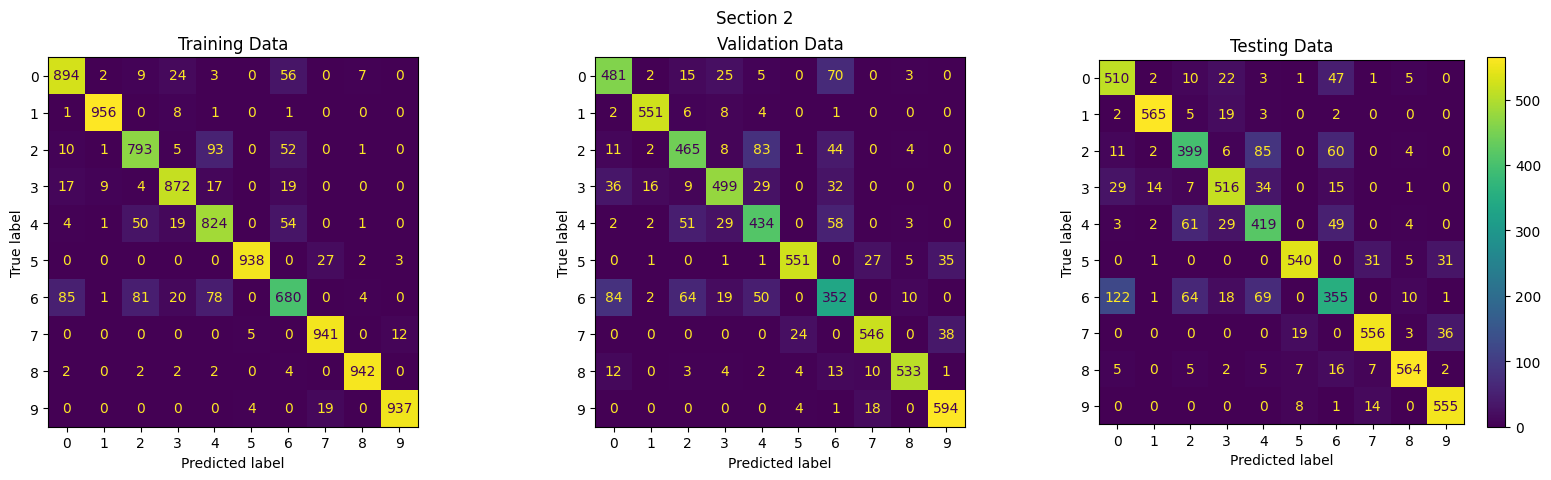

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


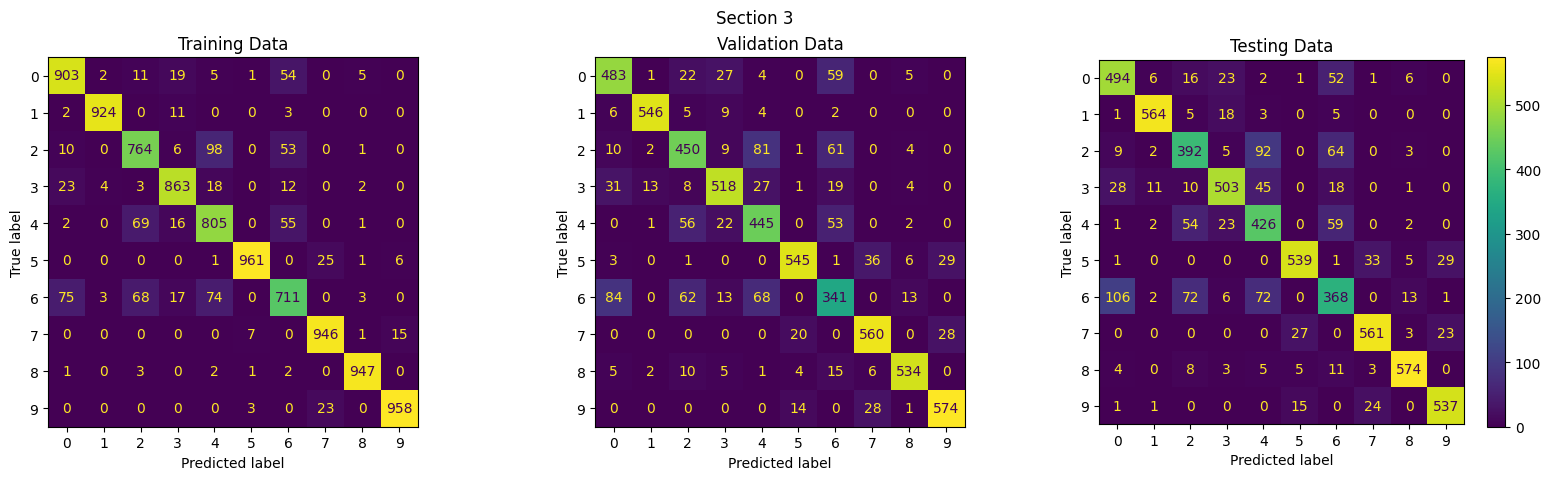

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


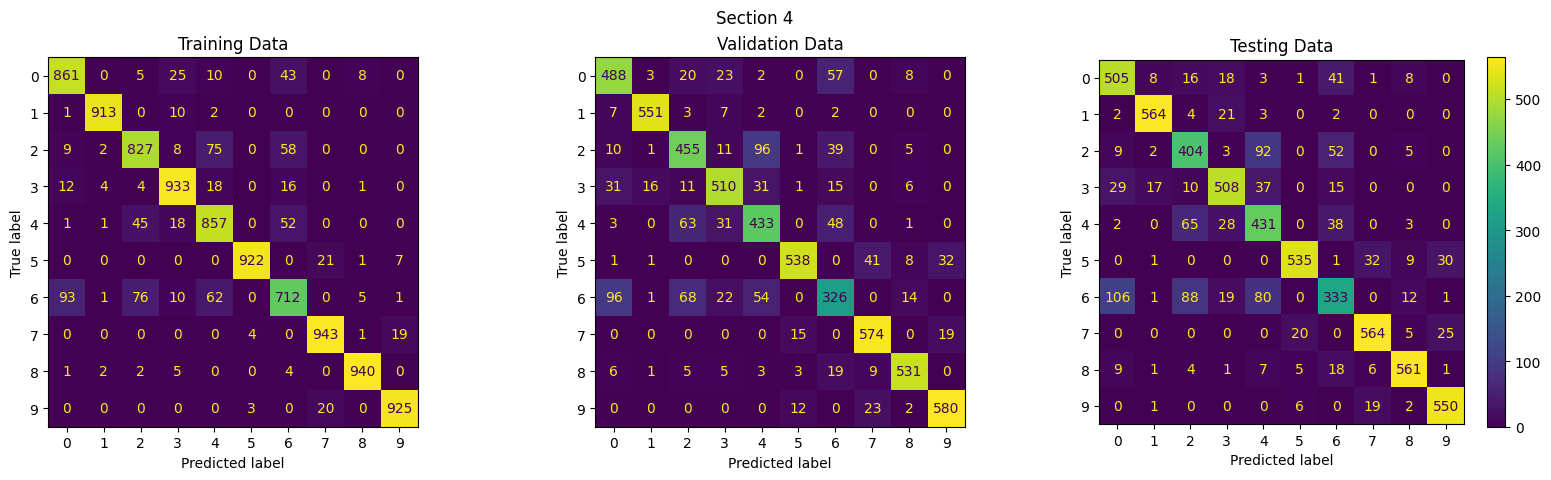

c:\Users\juandiego\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


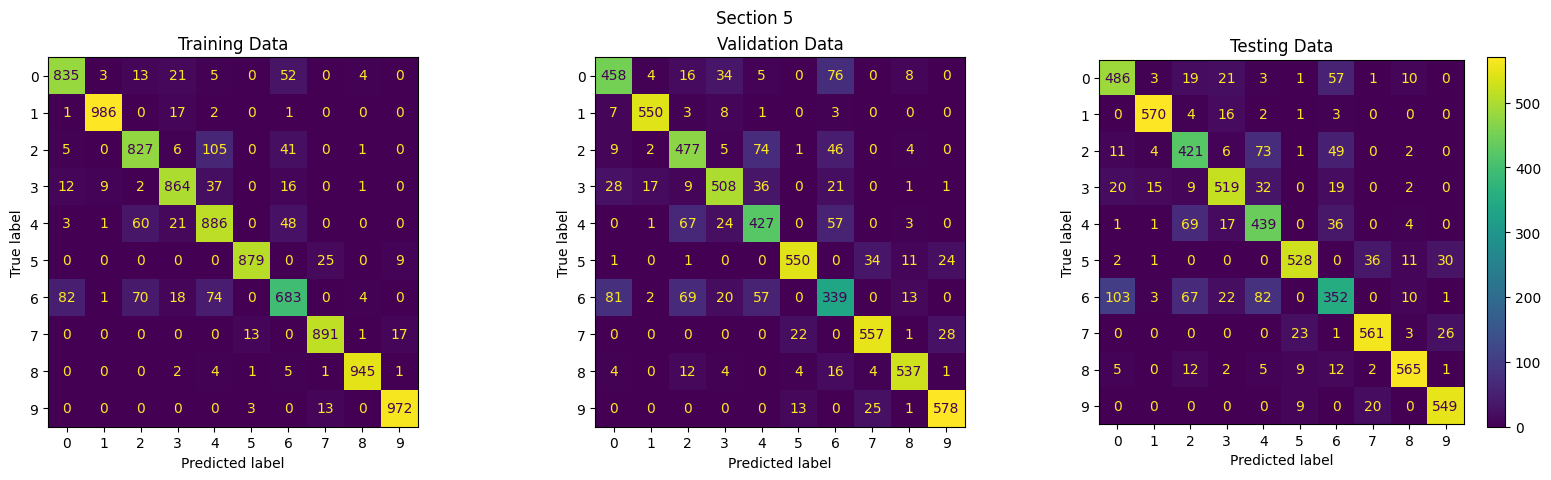

In [48]:
trainAndPlotConfusionMatrix(training_lab_1,
                            training_feat_1,
                            validation_lab,
                            validation_feat,
                            testing_lab,
                            testing_feat,
                            fig_label="Section 1")

trainAndPlotConfusionMatrix(training_lab_2,
                            training_feat_2,
                            validation_lab,
                            validation_feat,
                            testing_lab,
                            testing_feat,
                            fig_label="Section 2")

trainAndPlotConfusionMatrix(training_lab_3,
                            training_feat_3,
                            validation_lab,
                            validation_feat,
                            testing_lab,
                            testing_feat,
                            fig_label="Section 3")

trainAndPlotConfusionMatrix(training_lab_4,
                            training_feat_4,
                            validation_lab,
                            validation_feat,
                            testing_lab,
                            testing_feat,
                            fig_label="Section 4")

trainAndPlotConfusionMatrix(training_lab_5,
                            training_feat_5,
                            validation_lab,
                            validation_feat,
                            testing_lab,
                            testing_feat,
                            fig_label="Section 5")

### Sources:

https://www.v7labs.com/blog/train-testing-test-set#h2 - For Data division best practices
https://www.aiplusinfo.com/blog/introduction-to-vector-norms-l0-l1-l2-l-infinity/#:~:text=In%20machine%20learning%2C%20vector%20norms,norm%20is%20used%20for%20regularization. - To understand meaning of Lx regularization
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression - Docs for scikit library

### Who-did-what:

    Kevin Huaman: Dataset and code for metrics. (Non presented, but fundamental to build understandment trained models)
    Juan Diego Prochazka: Model training, improvments to graphing code. Efficiency improvements. Writing.

No AI tools where used in the previous work. (well, other than the scikit models!)